
# Bike Sharing Assignment
                                                                                                            -Jordan Dias

#### Problem Statement:


    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Essentially, the company wants —


- To identify the variables which are significant in predicting the demand for shared bikes.

- To create a linear model that quantitatively relates demand for bike rentals with variables such as year, month, season, tempreture etc.

- To know the accuracy of the model, i.e. how well these variables can predict the demand for shared bikes.


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
bike = pd.read_csv("day.csv")

In [5]:
# Check the head of the dataset
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Inspect the various aspects of the Bike Sharing dataframe. We will rename the columns for better understanding of the data.

In [6]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# check the dimensions of the dataframe
bike.shape

(730, 16)

The dataframe has 730 rows and 16 columns.

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Let's describe the dataframe to know about the minimum and maximum values of each column.

In [9]:
bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# check for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

We do not observe any null values. We move further to understand the columns.

### Variable Mapping

Looking at the data dictionary, we understand that the columns - `season` and `weathersit` contains values from 0 to 4. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. We will convert such feature values into categorical string values before proceeding with model building.
We also see the `month` and `weekday` column having numerical values, we will map corresponding name of the month and week of the day.

We observe that working day is '0' where weekday is '0' and '6', ``We assume '0' to be 'Sunday' and '6' to be Saturday since the working days are usually from Monday to Friday``

- `season`: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
- `month`: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
- `weathersit`: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
- `weekday`: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [11]:
# variable mapping for season, weathersit, month and weekday

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit'] = bike['weathersit'].map({1:"clear", 2:"cloudy", 3:"light snow", 4:"heavy snow"})
bike['month']=bike['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [12]:
# Check the housing dataframe now
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#check values for seasons
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
#check value for weathersit
bike.weathersit.value_counts()

clear         463
cloudy        246
light snow     21
Name: weathersit, dtype: int64

In [15]:
#check value for weathersit
bike.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Fri    104
Tue    104
Thu    104
Wed    103
Name: weekday, dtype: int64

In [16]:
#check value for weathersit
bike.month.value_counts()

Oct     62
July    62
Aug     62
Dec     62
May     62
Jan     62
Mar     62
Nov     60
June    60
Apr     60
Sep     60
Feb     56
Name: month, dtype: int64

Observations from dataset:
   - The categorical columns are: Season, Month, Weekday, Weathersit, Year, Working Day, Holiday
   - The numerical columns are: Instant, Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count.
   - The Target variable is: Count

## Step 2: Visualising the Data

Let's identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

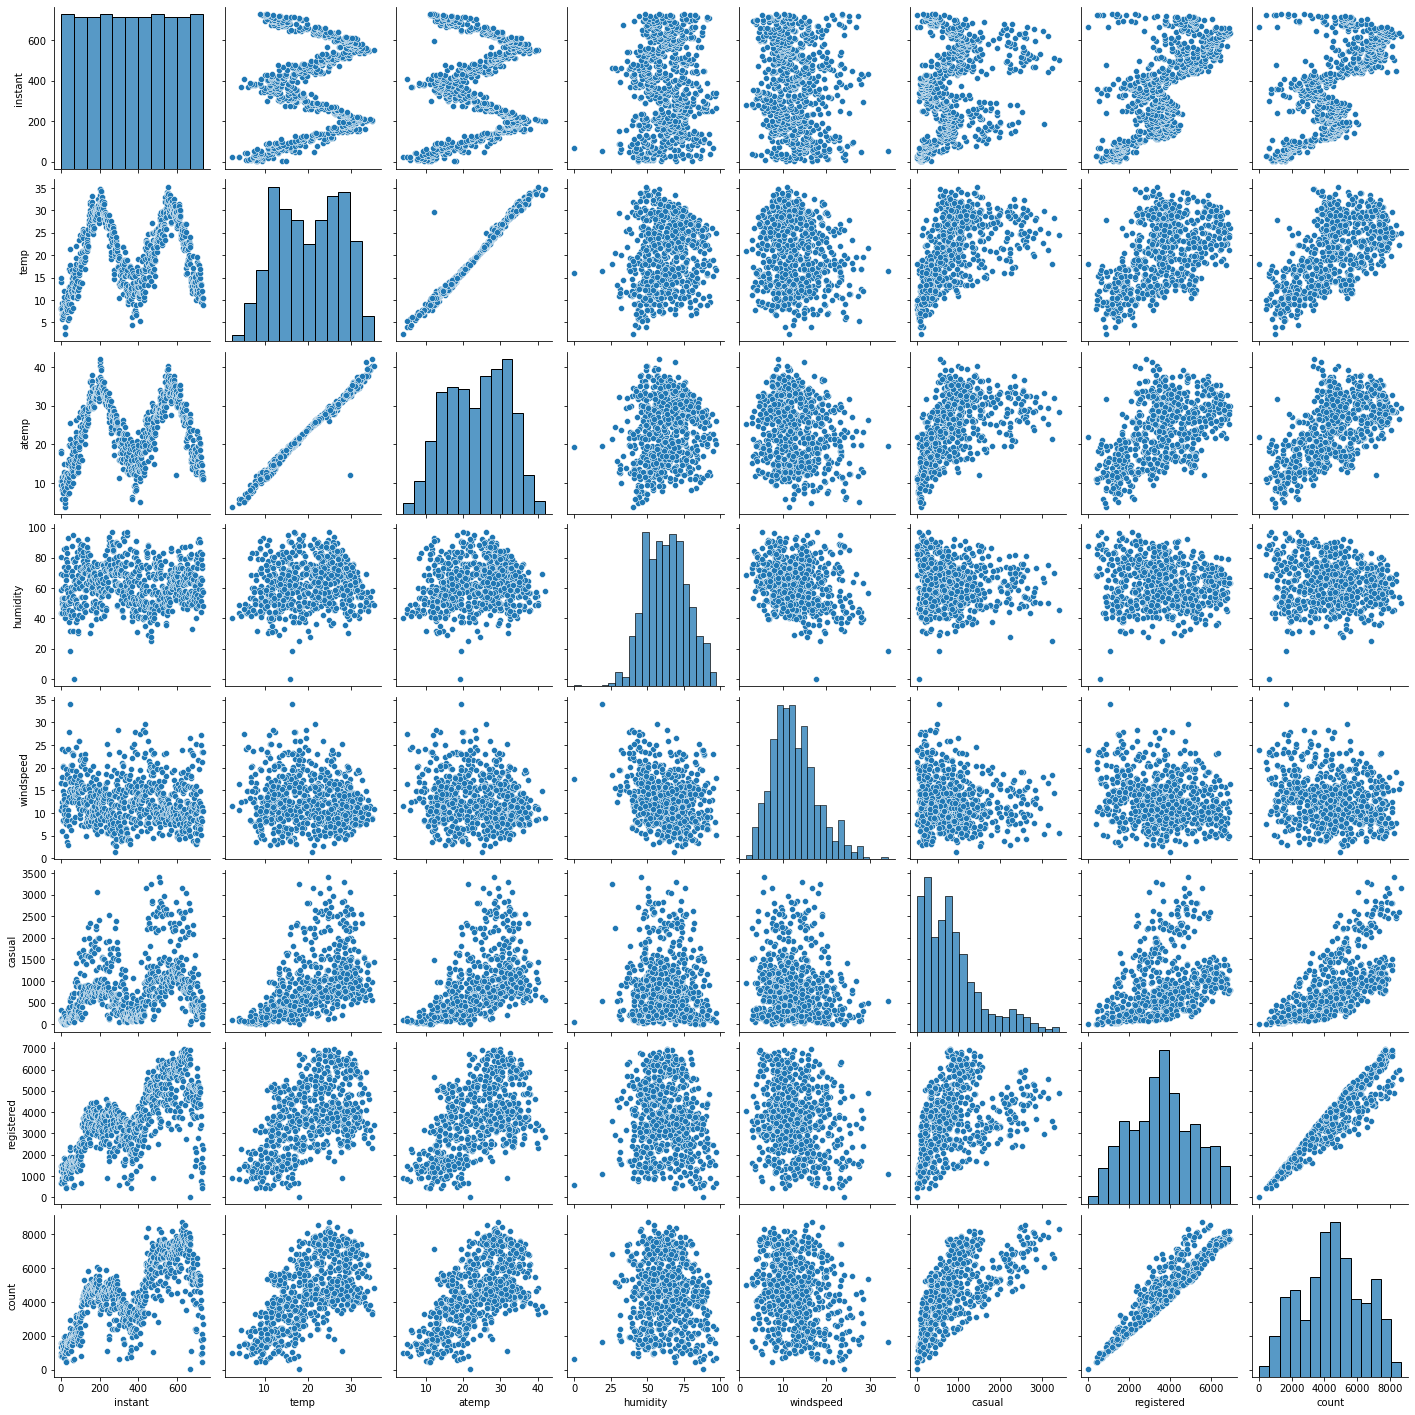

In [18]:
sns.pairplot(bike[['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
plt.show()

#### Observations from pairplot
- `instant` is only an index column
- `atemp` and `temp` are highly correlated with each other and also exhibit **highest correlation** with target variable - `count`. 
- `humidity` and `windspeed` are correlated to each other but show weak correlation against `count` column.
- `casual` and `registered` contains the count of bike booked by different categories of customers, but we ignore these columns since our objective is to find the total `count` of bikes and not by specific category.

In [19]:
bike['count'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: count, dtype: float64

Text(0, 0.5, 'Tempreture')

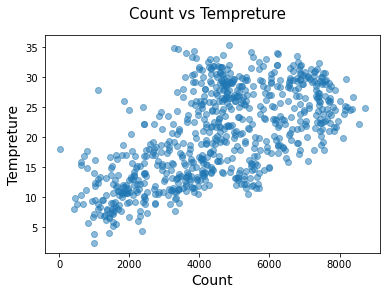

In [20]:
# Lets visualize plot for 'count' vs 'temp'
fig = plt.figure()
plt.scatter(bike['count'], bike['temp'], alpha = 0.5)
fig.suptitle('Count vs Tempreture', fontsize = 15)              # Plot heading 
plt.xlabel('Count', fontsize = 14)                          # X-label
plt.ylabel('Tempreture', fontsize = 14)  

We observe that that tempreture and count are correlated to each other. Bike rentals increase with increase in tempreture. This might be because people who usually walk prefer to ride bike to avoid sweating and fatigue.

Text(0, 0.5, 'Count')

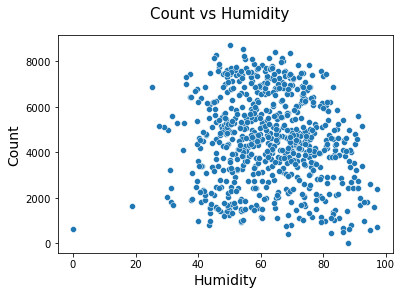

In [21]:
# Lets visualize plot for 'count' vs 'humidity'
fig = plt.figure()
sns.scatterplot(x='humidity', y='count',data=bike)
fig.suptitle('Count vs Humidity', fontsize = 15)              # Plot heading 
plt.xlabel('Humidity', fontsize = 14)                          # X-label
plt.ylabel('Count', fontsize = 14)  

Bike Rentals are more in humid weather.

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables with respect to target variable  - `count`.

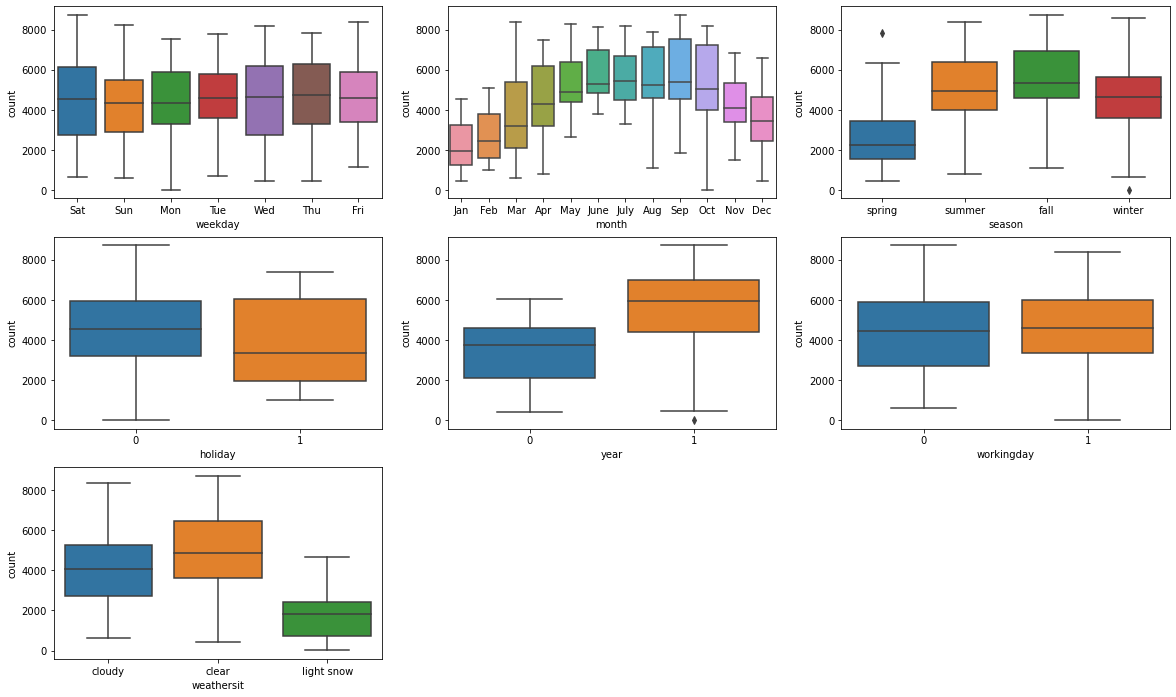

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.show()

#### Analysis of categorical variables
- `weekday` - This column has similar medians and the values doesn't vary drastically across each day. Thus the demand is same across all days of the week. 
- `month` - The demand for bikes increases from January to June. From June to September, the demand is the highest. The demand decreases as we move from October to December.
- `season` - The demand for bikes is most in Summers and Spring and is less in Winter and Spring. It is the least in Spring.
- `holiday` - On holidays, the demand varies more than on working days.
- `year` - The demand for bikes in 2019 was more than in 2018
- `workingday` - The demand remains the same for working days
- `weathersit` - Demand for bike is more when the sky is clear, it is medium for cloudy weather. Demand reduces if it snows.

<AxesSubplot:xlabel='month', ylabel='count'>

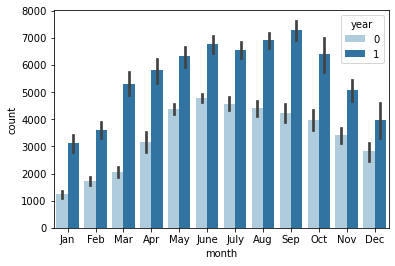

In [23]:
# Let us plot graph for bike rentals wrt months for both the years
sns.barplot(x = 'month', y = 'count', hue='year', data = bike, palette='Paired')

We observe that demand for bikes increased in year `2019`.

<AxesSubplot:xlabel='weathersit', ylabel='count'>

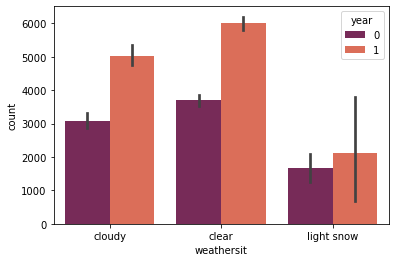

In [24]:
# Let us plot graph for bike rentals wrt weather for both the years
sns.barplot(x = 'weathersit', y = 'count', hue='year', data = bike, palette='rocket')

We observe that the bike rentals are usually low if its snows.

## Step 3: Data Preparation

- The `instant` column is nothing but an index column hence we drop this column. 
- Since we already have the year, month and day of the week, we do not require the `dteday` column. 
- `casual` and `registered` add up to make the `count`. Hence we don't need these two columns as well. 
- According to the pairplot analysis, we saw that `temp` and `atemp` are highly correlated with each other. We will drop one of those columns - `atemp` 

In [25]:
bike.drop(columns=['instant', 'dteday', 'registered', 'casual', 'atemp'], axis=1, inplace=True)

In [26]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


#### Checking datatypes

In [27]:
#Checking datatypes of all the columns
bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

### Dummy Variables

#### Dummy variables - Weathersit

The variable `weathersit` has three values. We need to convert these values into integer. 

For this, we will use something called `dummy variables`.

In [28]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(bike['weathersit'])

In [29]:
# Check what the dataset 'status' looks like
weather.head()

,clear,cloudy,light snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. We can drop the `clear` column, as the type of weather can be identified with just the last two columns where — 
- `00` will correspond to `clear`
- `01` will correspond to `cloudy`
- `10` will correspond to `light-snow`

In [30]:
# Let's drop the first column from status df using 'drop_first = True'
weather = pd.get_dummies(bike['weathersit'], drop_first = True)

In [31]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weather], axis = 1)

In [32]:
# Now let's see the head of our dataframe.
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,cloudy,light snow
0,spring,0,Jan,0,Sat,0,cloudy,14.110847,80.5833,10.749882,985,1,0
1,spring,0,Jan,0,Sun,0,cloudy,14.902598,69.6087,16.652113,801,1,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600,0,0


In [33]:
# Drop 'weathersit' as we have created the dummies for it
bike.drop(['weathersit'], axis = 1, inplace = True)

In [34]:
bike.head()

,season,year,month,holiday,weekday,workingday,temp,humidity,windspeed,count,cloudy,light snow
0,spring,0,Jan,0,Sat,0,14.110847,80.5833,10.749882,985,1,0
1,spring,0,Jan,0,Sun,0,14.902598,69.6087,16.652113,801,1,0
2,spring,0,Jan,0,Mon,1,8.050924,43.7273,16.636703,1349,0,0
3,spring,0,Jan,0,Tue,1,8.200000,59.0435,10.739832,1562,0,0
4,spring,0,Jan,0,Wed,1,9.305237,43.6957,12.522300,1600,0,0


#### Dummy variables - Season, Month, Weekday

Similarly we will convert `month`, `season`, `weathersit` values into integer as well. 

In [35]:
# Get the dummy variables for the feature 'season', 'month', 'weekday' and store it in a new variables
seasons = pd.get_dummies(bike['season'], drop_first = True)
months = pd.get_dummies(bike['month'], drop_first = True)
weekdays = pd.get_dummies(bike['weekday'], drop_first = True)

In [36]:
# Check what the dataset 'seasons' looks like
seasons.sample(3)

,spring,summer,winter
510,0,1,0
530,0,1,0
728,1,0,0


In [37]:
# Check what the dataset 'months' looks like
months.sample(3)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
121,0,0,0,0,0,0,0,1,0,0,0
676,0,0,0,0,0,0,0,0,1,0,0
112,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Check what the dataset 'weekday' looks like
weekdays.sample(3)

,Mon,Sat,Sun,Thu,Tue,Wed
661,0,0,0,0,0,1
191,1,0,0,0,0,0
65,1,0,0,0,0,0


In [39]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, seasons], axis = 1)
bike = pd.concat([bike, months], axis = 1)
bike = pd.concat([bike, weekdays], axis = 1)

In [40]:
# Now let's see the sample of our dataframe.
bike.sample(5)

,season,year,month,holiday,weekday,workingday,temp,humidity,windspeed,count,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
119,summer,0,Apr,0,Sat,0,19.372500,50.3333,15.750025,5312,...,0,0,0,0,0,1,0,0,0,0
504,summer,1,May,0,Sun,0,25.454153,53.0417,17.042589,7129,...,1,0,0,0,0,0,1,0,0,0
237,fall,0,Aug,0,Fri,1,28.700000,76.1250,5.625488,4661,...,0,0,0,0,0,0,0,0,0,0
264,fall,0,Sep,0,Thu,1,25.761653,90.2083,8.584375,4795,...,0,0,0,1,0,0,0,1,0,0
426,spring,1,Mar,0,Sat,0,16.980847,62.1250,10.792293,4066,...,0,0,0,0,0,1,0,0,0,0


In [41]:
# Drop 'season', 'month', 'weekday' as we have created the dummies for these columns
bike.drop(['season'], axis = 1, inplace = True)
bike.drop(['month'], axis = 1, inplace = True)
bike.drop(['weekday'], axis = 1, inplace = True)

In [42]:
bike.head()

,year,holiday,workingday,temp,humidity,windspeed,count,cloudy,light snow,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use MinMax scaling.

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Let's describe and see the max values of each columns. This will help us identify which variables need to be rescaled.

In [46]:
bike.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,cloudy,light snow,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.336986,0.028767,0.246575,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.473004,0.167266,0.431313,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# Apply scaler() to all necessary columns
num_vars = ['temp', 'humidity', 'windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,cloudy,light snow,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,cloudy,light snow,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.343137,0.029412,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.475223,0.169124,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see all the variables are now scaled between 0 and 1.

In [50]:
# check the datatypes of all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   humidity    510 non-null    float64
 5   windspeed   510 non-null    float64
 6   count       510 non-null    float64
 7   cloudy      510 non-null    uint8  
 8   light snow  510 non-null    uint8  
 9   spring      510 non-null    uint8  
 10  summer      510 non-null    uint8  
 11  winter      510 non-null    uint8  
 12  Aug         510 non-null    uint8  
 13  Dec         510 non-null    uint8  
 14  Feb         510 non-null    uint8  
 15  Jan         510 non-null    uint8  
 16  July        510 non-null    uint8  
 17  June        510 non-null    uint8  
 18  Mar         510 non-null    uint8  
 19  May         510 non-null    

Let's Go ahead and plot the correlation matrix to see which all columns are correlated with our target variable - `count`

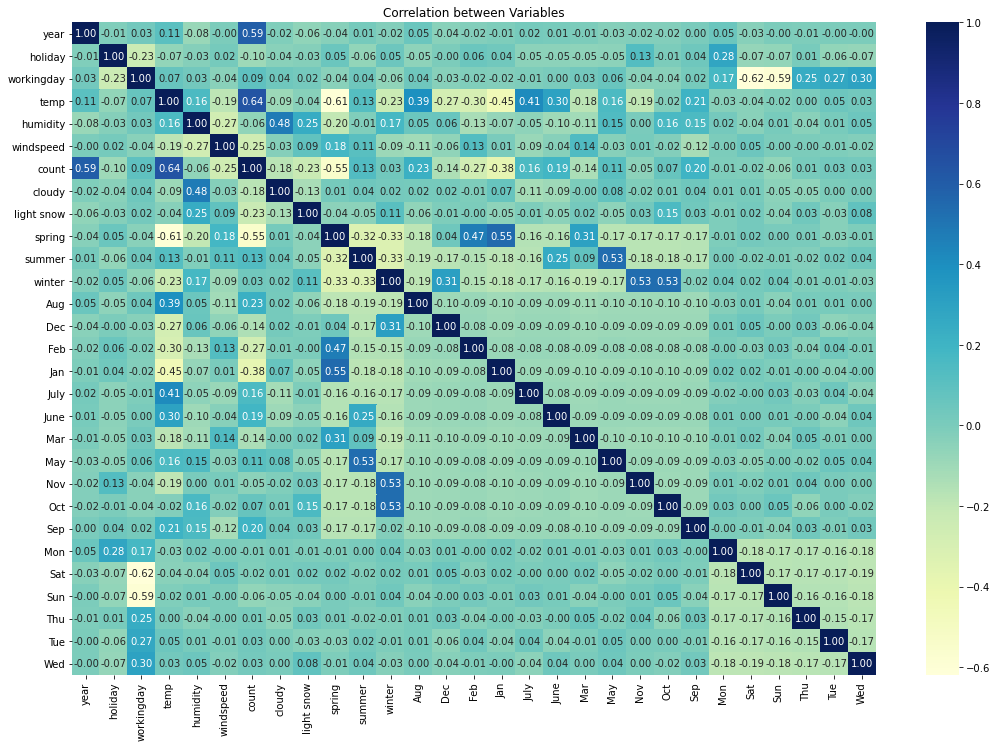

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (18, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",fmt='.2f')
plt.title("Correlation between Variables")
plt.show()

We observe that tempreture, year, spring have good influence on the count of bike rentals

### Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('count')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### RFE
Recursive feature elimination

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('cloudy', True, 1),
 ('light snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12)]

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'cloudy', 'light snow', 'spring', 'summer', 'winter', 'July', 'Sep',
       'Sat', 'Sun'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics
### Model 1

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [60]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.13e-191
Time:                        20:51:14   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

### Model 2
#### Dropping the variable and updating the model

As we can see from the summary `holiday`  has a very high p-value of `0.373`. Let's go ahead and drop this variable

In [62]:
# Dropping highly correlated variables and insignificant variables
X_1 = X_train_rfe.drop(["holiday"], axis = 1)

In [63]:
# we will define a function which can be later used to create linear regression models.
def createModel(X_train):
    X_train_lm = sm.add_constant(X_train)
    return sm.OLS(y_train, X_train_lm).fit()

lr_1 = createModel(X_1)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.13e-191
Time:                        20:51:14   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

Looking at the p-values, we see that non of the features have p-value greater than 0.05
We will now calculate VIF to see if any columns can be dropped

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

calculate_VIF(X_1)

,Features,VIF
3,humidity,32.14
2,temp,18.98
1,workingday,18.41
12,Sat,4.91
4,windspeed,4.90
7,spring,4.80
13,Sun,4.76
9,winter,3.71
8,summer,3.03
5,cloudy,2.31


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Model 3
#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some varibles have high VIF. `humidity` has high VIF of `32.14` which in unacceptable range. Hence we drop this column and create new model.

In [66]:
# Dropping highly correlated variables and insignificant variables
X_2 = X_1.drop('humidity', axis=1)

In [67]:
# Build a third fitted model
lr_2 = createModel(X_2)
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          5.73e-189
Time:                        20:51:14   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [68]:
# Calculate the VIFs again for the new model
calculate_VIF(X_2)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
11,Sat,4.45
12,Sun,4.21
6,spring,3.82
8,winter,2.80
7,summer,2.75
0,year,2.07
9,July,1.60


### Model 4
#### Dropping the Variable and Updating the Model

As you can notice the variable `workingday` has a significantly high VIF (`16.19`). Hence, this variable isn't of much use and should be dropped.

In [69]:
# Dropping highly correlated variables and insignificant variables
X_3 = X_2.drop('workingday', axis=1)

In [70]:
# Build a second fitted model
lr_3 = createModel(X_3)
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.01e-186
Time:                        20:51:14   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

We observe `Sat` column has high `p-value` of `0.171`. Let us check the VIF for this column as well.

In [71]:
calculate_VIF(X_3)

,Features,VIF
1,temp,5.17
2,windspeed,4.62
6,summer,2.23
5,spring,2.11
0,year,2.07
7,winter,1.82
8,July,1.59
3,cloudy,1.55
9,Sep,1.33
10,Sat,1.22


### Model 5
#### Dropping the variable and updating the model

Although `temp` column has high VIF of `5.17` and `Sat` column has low VIF, We observed that `Sat` column has high p-value `0.171`. We will drop `Sat` column and check if VIF for `temp` decreases.

In [72]:
X_4 = X_3.drop('Sat', axis=1)

In [73]:
lr_4 = createModel(X_4)
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.65e-187
Time:                        20:51:14   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

There aren't any variables having high p-value. Lets find VIF and check if we can drop any more columns

In [74]:
calculate_VIF(X_4)

,Features,VIF
1,temp,5.13
2,windspeed,4.60
6,summer,2.22
5,spring,2.09
0,year,2.07
7,winter,1.80
8,July,1.59
3,cloudy,1.55
9,Sep,1.33
10,Sun,1.17


### Model 6
#### Dropping the variable and updating the model

As you might have noticed, dropping `Sat` decreased the VIF of `temp` but yet it is not under 5. We will try dropping this variable and see the impact.

In [75]:
X_5 = X_4.drop('temp', axis = 1)

In [76]:
# Build a fourth fitted model
lr_5 = createModel(X_5)
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.2
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          3.10e-149
Time:                        20:51:14   Log-Likelihood:                 406.26
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5889      0.017     34.820      0.0

We observe that after dropping `temp` column, the **R squared dropped** drastically. Hence we will not drop this column and continue our model building by dropping some other column.

Let's look at summary of Model 5 (lr_4) which is summary of model just before dropping `temp` column.

In [77]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          1.65e-187
Time:                        20:51:14   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

There aren't any columns with high `p-value`. Hence we will look for High VIF.

In [78]:
calculate_VIF(X_4)

,Features,VIF
1,temp,5.13
2,windspeed,4.60
6,summer,2.22
5,spring,2.09
0,year,2.07
7,winter,1.80
8,July,1.59
3,cloudy,1.55
9,Sep,1.33
10,Sun,1.17


### Model 7
#### Dropping the variable and updating the model

Since dropping highest VIF dropped R-squared significantly, we will drop variable with second highest VIF - `windspeed` and check if it reduces the VIF for `temp`.

In [79]:
X_6 = X_4.drop('windspeed', axis=1)

In [80]:
lr_6 = createModel(X_6)
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          2.94e-181
Time:                        20:51:14   Log-Likelihood:                 481.93
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     499   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.029      5.239      0.0

In [81]:
calculate_VIF(X_6)

,Features,VIF
1,temp,4.26
0,year,2.06
5,summer,1.93
6,winter,1.59
7,July,1.58
2,cloudy,1.54
4,spring,1.41
8,Sep,1.33
9,Sun,1.17
3,light snow,1.07


Now as you can see, after dropping the `Windspeed` column, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
X_6_lm = sm.add_constant(X_6)
y_train_demand = lr_6.predict(X_6_lm)

Text(0.5, 0, 'Errors')

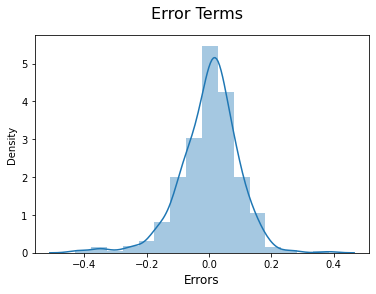

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_demand), bins = 16)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

From the abouve plotted histogram, we can say that the residuals of the model are **normally distributed**.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [84]:
num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [85]:
y_test = df_test.pop('count')
X_test = df_test

In [86]:
# Creating X_test_m5 dataframe by dropping variables from X_test
X_test_m6 = X_test[X_6.columns]

# Adding a constant variable 
X_test_m6 = sm.add_constant(X_test_m6)

In [87]:
# Making predictions using the fourth model

y_pred_m6 = lr_6.predict(X_test_m6)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

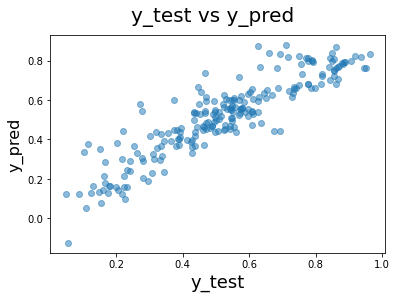

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Looking at the graph,  we can say 
- The model is **Homoscedastic** i.e. The residuals have constant variance at every level of x.
- The model satisfies the assumption of **linearity**.

We have now validated that all the Assumptions of Linear Regression are taken care of and we can safely say that we can expect good results if we take care of the assumptions.

#### R-Squared score

In [89]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m6)

0.8098104466244753

#### Asjusted R-Squared score

In [90]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.808699)*(10-1)/(10-1-1)
print(Adj_r2)

0.7847863749999999


There is only `3.1%` difference in R-Squared and Adjusted R-Squared which is acceptable.

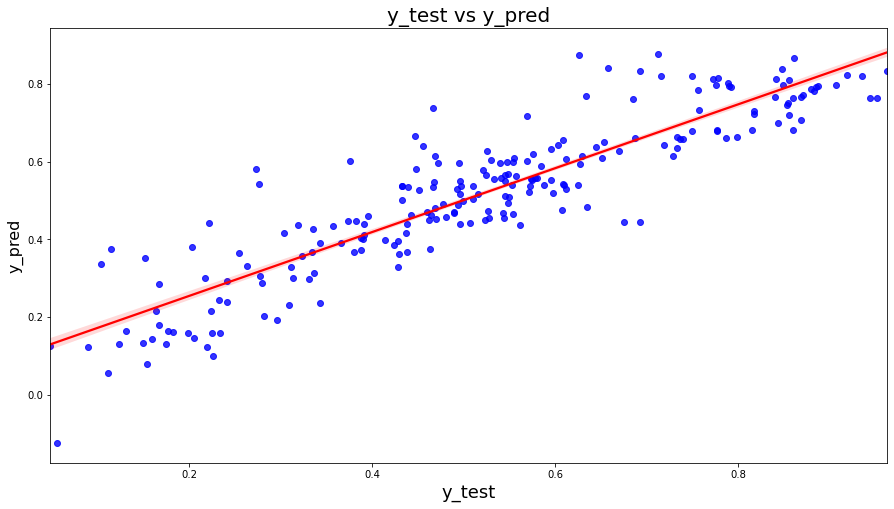

In [91]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_m6, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Text(0.5, 0, 'Errors')

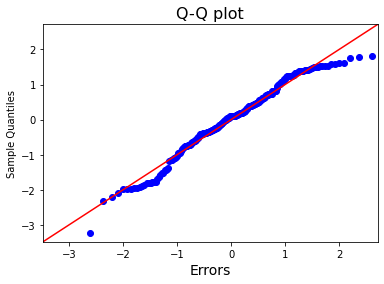

In [92]:
import scipy.stats as stats

sm.qqplot(y_pred_m6, stats.t, fit=True, line="45", distargs=(4,))
plt.title('Q-Q plot', fontsize=16)
plt.xlabel('Errors', fontsize=14)

From the above QQ plot, we can see that the Residual Quantiles are following a straight line, meaning the distribution is normal.

## Final Model Interpretation

### Coefficients of the final model

In [93]:
# lets look at the coefficients of the model
lr_6.params

const         0.153545
year          0.232825
temp          0.504355
cloudy       -0.079783
light snow   -0.300370
spring       -0.077598
summer        0.036786
winter        0.084190
July         -0.048841
Sep           0.076435
Sun          -0.045044
dtype: float64

### F-statistics

- F-Statistic: 234.1
- Prob (F-statistic): 2.94e-181

Prob(F-statistic) value is less than 0.05. Hence, we can conclude that our model fit is significant.

### R-Squared
- Training data 
    - R-Squared: `0.824`
    - Adjusted R-squared:  `0.821`
    
        
- Testing data 
    - R-Squared: `0.810`
    - Adjusted R-squared: `0.785`


### Equation of best fitted line


We can see that the equation of our best fitted line is:

$ count = 0.2328  \times  year + 0.5044  \times  temp - 0.0798 \times cloudy - 0.3004 \times light snow - 0.0776 \times spring + 0.0368 \times summer + 0.0842 \times winter - 0.0488 \times July + 0.0764 \times Sep - 0.0450 \times Sun $


### Interpretation of Coefficients:

`year`     - A unit increase in year will increase the bike sales by `0.2328` units. <hr>
`temp`     - A unit increase in temperature will increase the bike sales by `0.5044` units. <hr>
`cloudy`   - A cloudy weather will decrease the bike sales by `0.0798` units. <hr>
`lightsnow`- A light snowy weather will decrease the bike sales by `0.3004` units. <hr>
`spring`   - In Spring season, the bike sales will decrease by `0.0776` units. <hr>
`summer`   - In Summers, bike sales will increase by `0.0842` units. <hr>
`july`     - In the month of July, the bike sales decrease by `0.0488` units. <hr>
`sep`      - In the month of September, the bike sales increase by `0.0764` units. <hr>
`sun`      - On Sundays, the bike sales drop by `0.0450` units. <hr>